In [33]:
import os
import re
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import optuna
from optuna.storages import RDBStorage

from sklearn.linear_model import LinearRegression

In [34]:
study_dir = '/mnt/nas/optuna_studies.db'

font_size = 16

In [38]:
storage = RDBStorage(url=f"sqlite:///{study_dir}")
study_summaries = optuna.get_all_study_summaries(storage=storage)
study_names = [summary.study_name for summary in study_summaries]
studies = [optuna.load_study(study_name=study_name, storage=f"sqlite:///{study_dir}") for study_name in study_names]
entries = []
for study in studies:
    completed_trials = [trial for trial in study.trials if trial.value is not None and trial.state == optuna.trial.TrialState.COMPLETE]
    pruned_trials = [trial for trial in study.trials if trial.state == optuna.trial.TrialState.PRUNED]
    study_name = study.study_name
    study_setting = study_name[0:2]
    model_match = re.search(r'_m-([^_]+)', study_name)
    model_type = model_match.group(1) if model_match else None
    out_match = re.search(r'_out-([^_]+)', study_name)
    out_type = out_match.group(1) if out_match else None
    freq_match = re.search(r'_freq-([^_]+)', study_name)
    freq_type = freq_match.group(1) if freq_match else None
    additional = None
    if len(study_name.split('_')) > 4:
        additional = study_name.split('_')[-1]
    entry = {
        'study_name': study.study_name,
        'model': model_type,
        'setting': study_setting,
        'add': additional,
        'n_trials': len(study.trials),
        'n_compl_trials': len(completed_trials),
        'n_pruned_trials': len(pruned_trials),
        'best_value': round(study.best_trial.value, 4) if study.best_trial is not None else None,
    }
    entries.append(entry)
results = pd.DataFrame(entries)
#results_styled = results.style.set_properties(subset=['study_name'], **{'text-align': 'left'})
results

,study_name,model,setting,add,n_trials,n_compl_trials,n_pruned_trials,best_value
0,fl_a-fedavg_d-pvod_m-tcn-gru_out-48_freq-1h_pers,tcn-gru,fl,pers,27,25,0,0.0823
1,fl_a-fedavg_d-pvod_m-tcn-gru_out-48_freq-1h,tcn-gru,fl,freq-1h,38,37,0,0.0977
2,fl_a-fedavg_d-pvod_m-tcn-gru_out-48_freq-1h_gt...,tcn-gru,fl,pers,31,27,0,0.0853
3,fl_a-fedavg_d-pvod_m-tcn-gru_out-48_freq-1h_gti,tcn-gru,fl,gti,26,25,0,0.0991
4,fl_a-fedadam_d-pvod_m-tcn-gru_out-48_freq-1h,tcn-gru,fl,freq-1h,41,37,0,0.0984
5,fl_a-fedadam_d-pvod_m-tcn-gru_out-48_freq-1h_gti,tcn-gru,fl,gti,34,29,0,0.0997
6,fl_a-fedadam_d-pvod_m-tcn-gru_out-48_freq-1h_g...,tcn-gru,fl,pers,126,112,0,0.0818
7,fl_a-fedadam_d-pvod_m-tcn-gru_out-48_freq-1h_pers,tcn-gru,fl,pers,164,153,0,0.0802
8,cl_d-pvod_m-tcn-gru_out-48_freq-1h_incrfltrs-True,tcn-gru,cl,incrfltrs-True,21,19,0,0.0206
9,cl_d-pvod_m-tcn-gru_out-48_freq-1h,tcn-gru,cl,freq-1h,139,133,0,0.0057


In [5]:
study = study_summaries[14].study_name
#optuna.delete_study(study_name=study, storage=f"sqlite:///{study_dir}")

### Best Trial

In [6]:
for study in study_summaries:
    print(f'Best trial of {study.study_name}')
    trial = study.best_trial
    if not trial:
        print('No best trial for this.')
        continue
    print(f'  Error: {trial.value}')
    print('  Params: ')
    for key, value in trial.params.items():
        print(f'    {key}: {value}')
    print()

Best trial of fl_a-fedavg_d-pvod_m-tcn-gru_out-48_freq-1h_pers
  Error: 0.08225551364208462
  Params: 
    batch_size: 45
    epochs: 10
    lr: 0.0008657474485291862
    n_rounds: 30
    filters: 31
    kernel_size: 3
    n_cnn_layers: 5
    units: 102
    n_rnn_layers: 3

Best trial of fl_a-fedavg_d-pvod_m-tcn-gru_out-48_freq-1h
  Error: 0.09771618896745958
  Params: 
    batch_size: 87
    epochs: 18
    lr: 0.0006109480411664502
    n_rounds: 28
    filters: 39
    kernel_size: 2
    n_cnn_layers: 1
    units: 203
    n_rnn_layers: 3

Best trial of fl_a-fedavg_d-pvod_m-tcn-gru_out-48_freq-1h_gti_pers
  Error: 0.08525738747249116
  Params: 
    batch_size: 135
    epochs: 31
    lr: 0.0002389713574364091
    n_rounds: 28
    filters: 34
    kernel_size: 3
    n_cnn_layers: 5
    units: 251
    n_rnn_layers: 2

Best trial of fl_a-fedavg_d-pvod_m-tcn-gru_out-48_freq-1h_gti
  Error: 0.09908610214949151
  Params: 
    batch_size: 68
    epochs: 39
    lr: 0.0012230975691669094
    n_rou

In [14]:
def ten_best(study):
    trials = [trial for trial in study.trials if trial.value is not None and trial.state == optuna.trial.TrialState.COMPLETE]
    sorted_trials = sorted(trials, key=lambda x: x.value)
    print("Top 10 Trials:", '\n')
    for trial in sorted_trials[:10]:
        print(f"Trial {trial.number}: MAE = {trial.value}")
        print(f"  Params: {trial.params}")
        print()

HPO Progess of fl_a-fedavg_d-pvod_m-tcn-gru_out-48_freq-1h_pers
Improvement per Trial: 0.00543858047601917


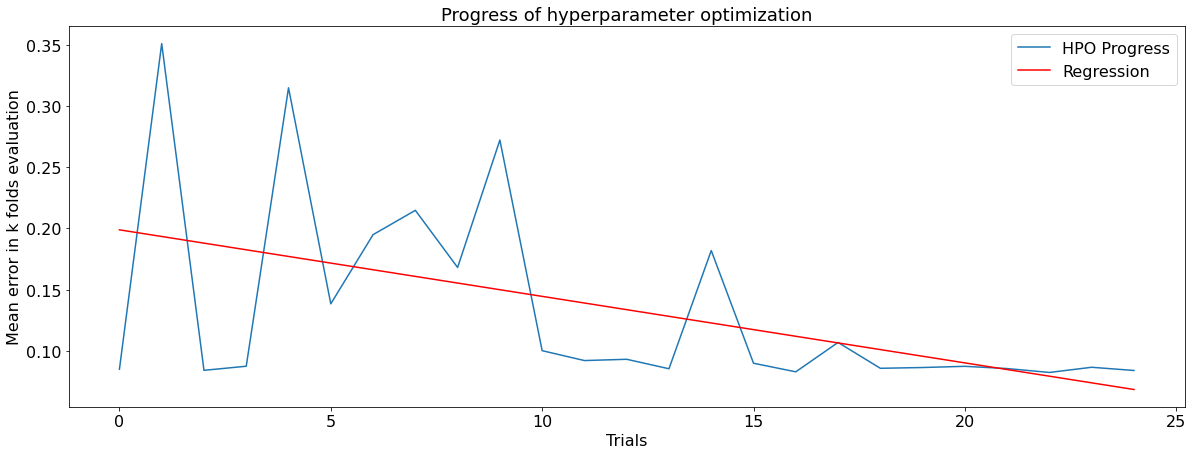

HPO Progess of fl_a-fedavg_d-pvod_m-tcn-gru_out-48_freq-1h
Improvement per Trial: 0.003818398958585196


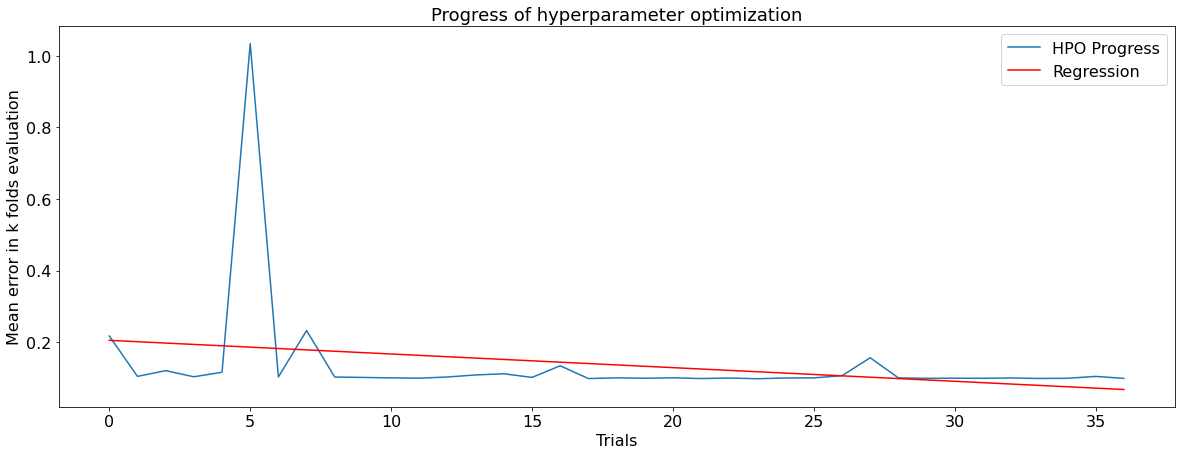

HPO Progess of fl_a-fedavg_d-pvod_m-tcn-gru_out-48_freq-1h_gti_pers
Improvement per Trial: 0.004995579408264376


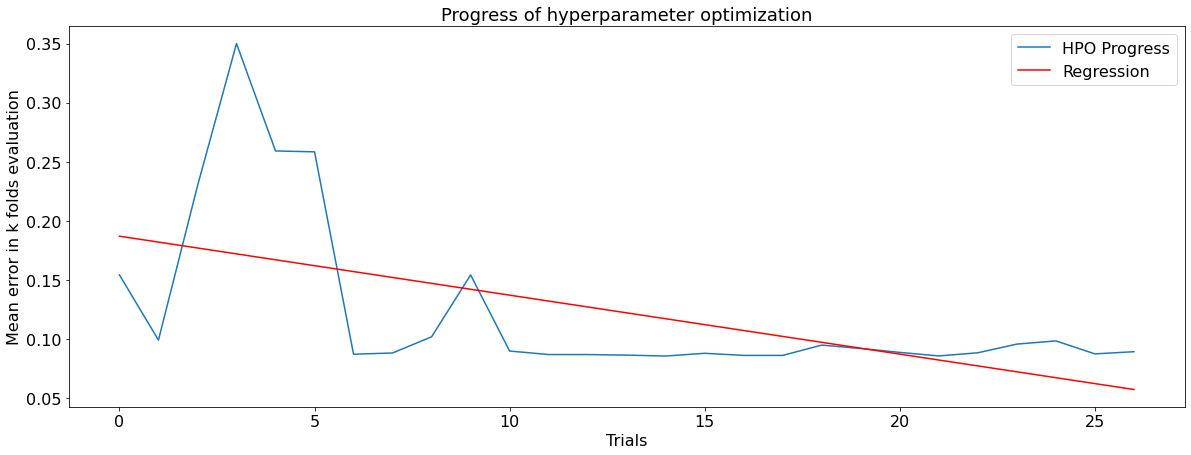

HPO Progess of fl_a-fedavg_d-pvod_m-tcn-gru_out-48_freq-1h_gti
Improvement per Trial: 0.0029037341148970787


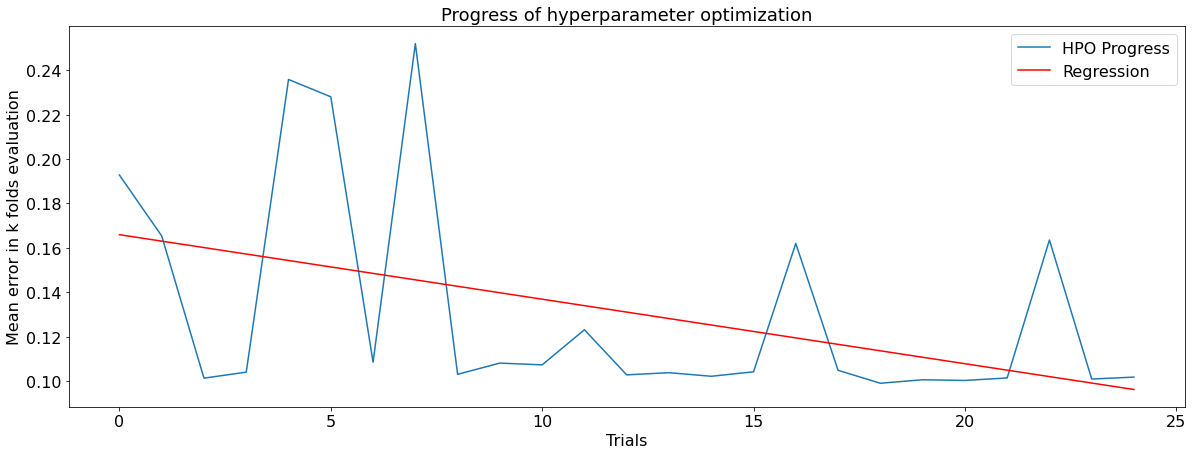

HPO Progess of fl_a-fedadam_d-pvod_m-tcn-gru_out-48_freq-1h
Improvement per Trial: 0.0035014252131636246


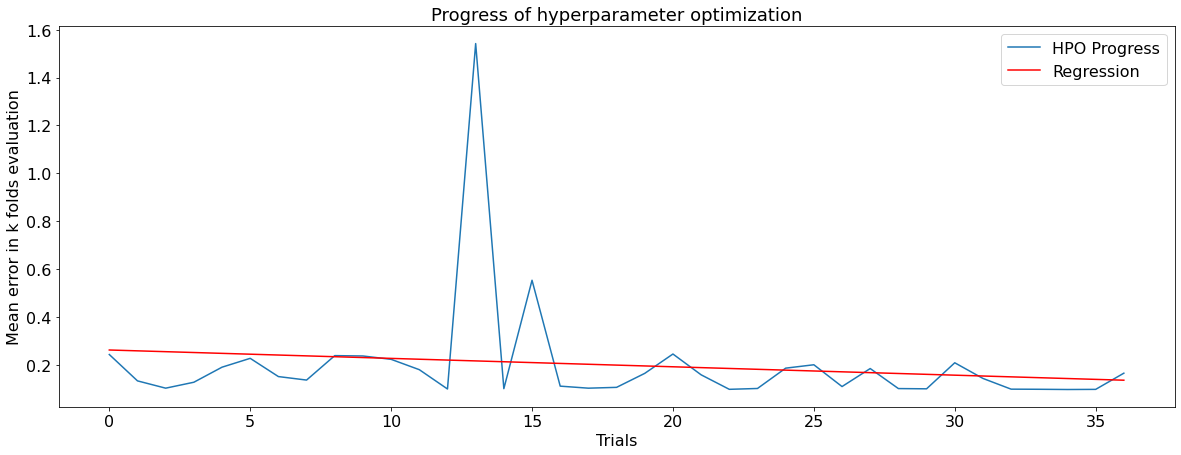

HPO Progess of fl_a-fedadam_d-pvod_m-tcn-gru_out-48_freq-1h_gti
Improvement per Trial: 0.004840975124868582


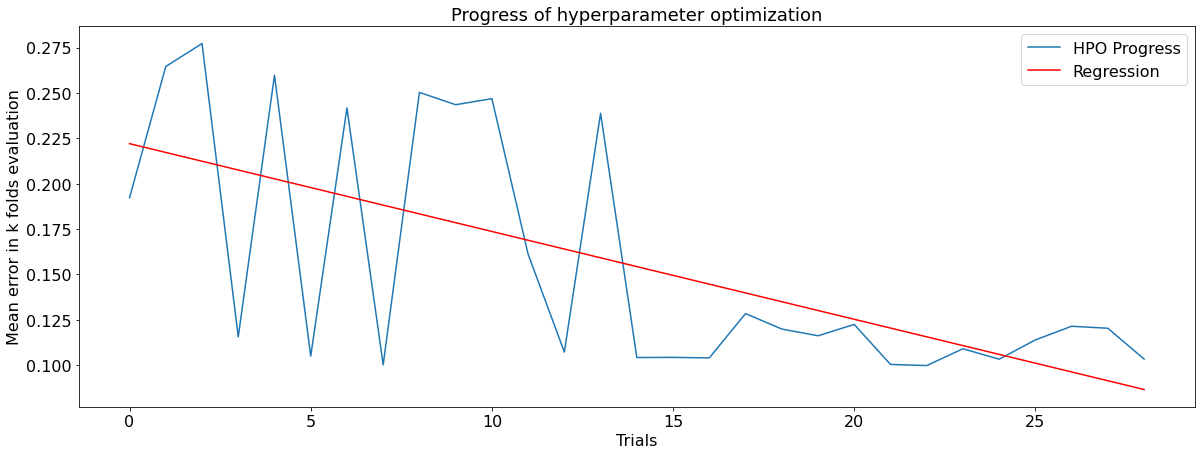

HPO Progess of fl_a-fedadam_d-pvod_m-tcn-gru_out-48_freq-1h_gti_pers
Improvement per Trial: 0.0006158742267837701


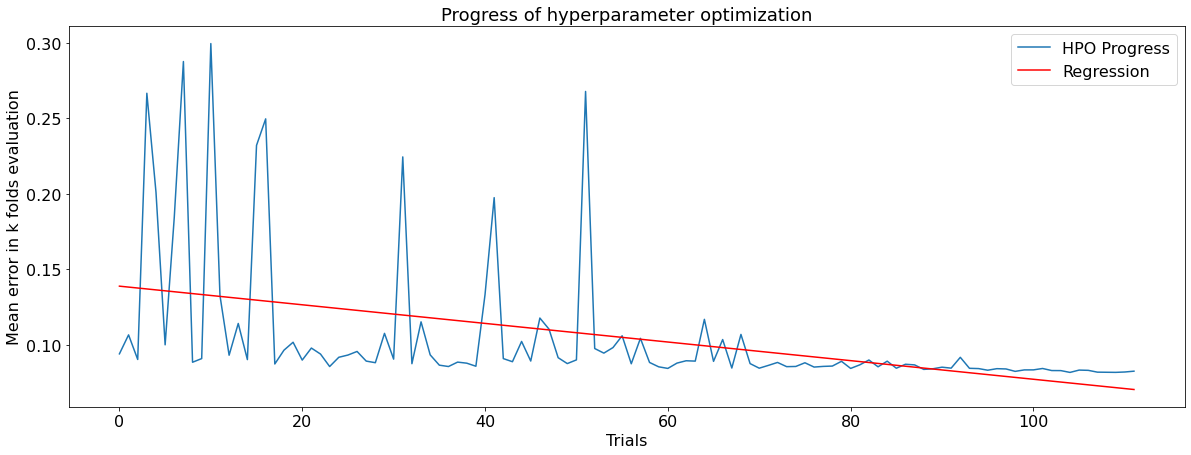

HPO Progess of fl_a-fedadam_d-pvod_m-tcn-gru_out-48_freq-1h_pers
Improvement per Trial: 0.000282355976120818


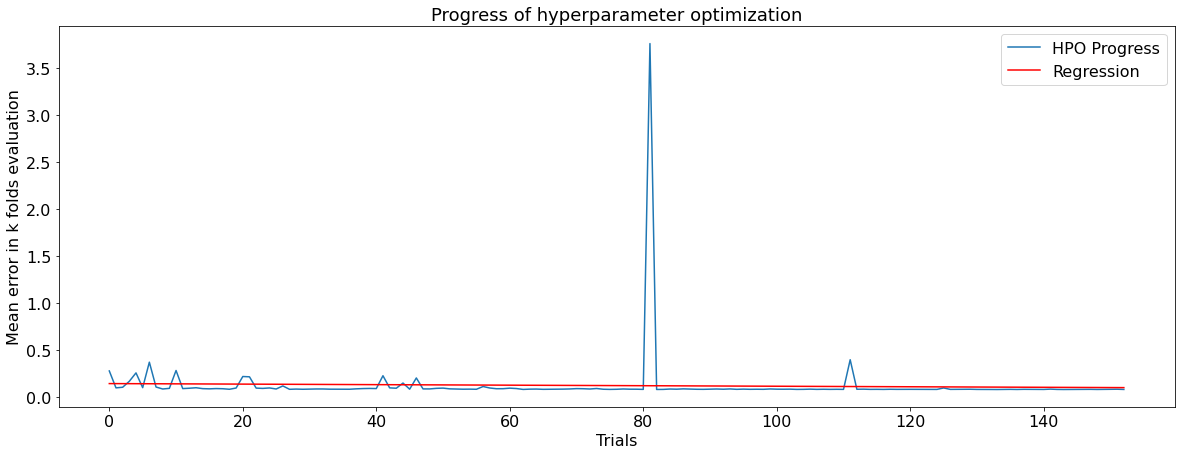

HPO Progess of cl_d-pvod_m-tcn-gru_out-48_freq-1h_incrfltrs-True
Improvement per Trial: 0.0026358639416203173


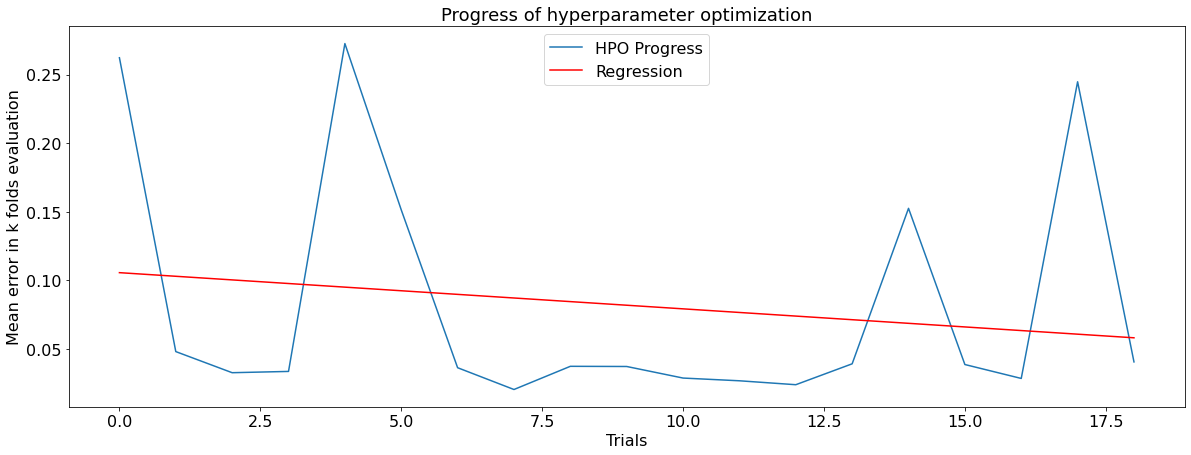

HPO Progess of cl_d-pvod_m-tcn-gru_out-48_freq-1h
Improvement per Trial: 0.0005603300180078321


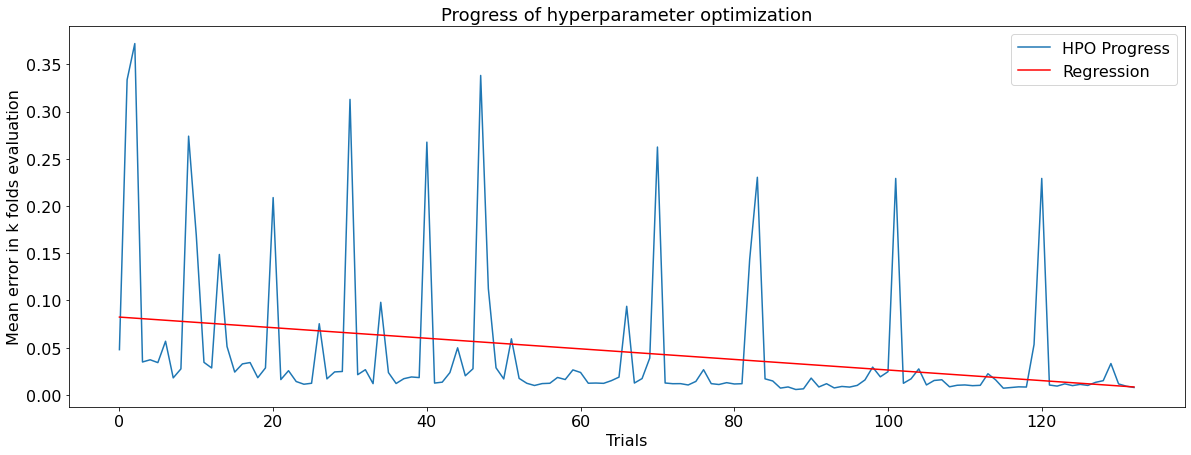

HPO Progess of cl_m-tcn-gru_out-48_freq-1h_00164
Improvement per Trial: 0.00010738547126291388


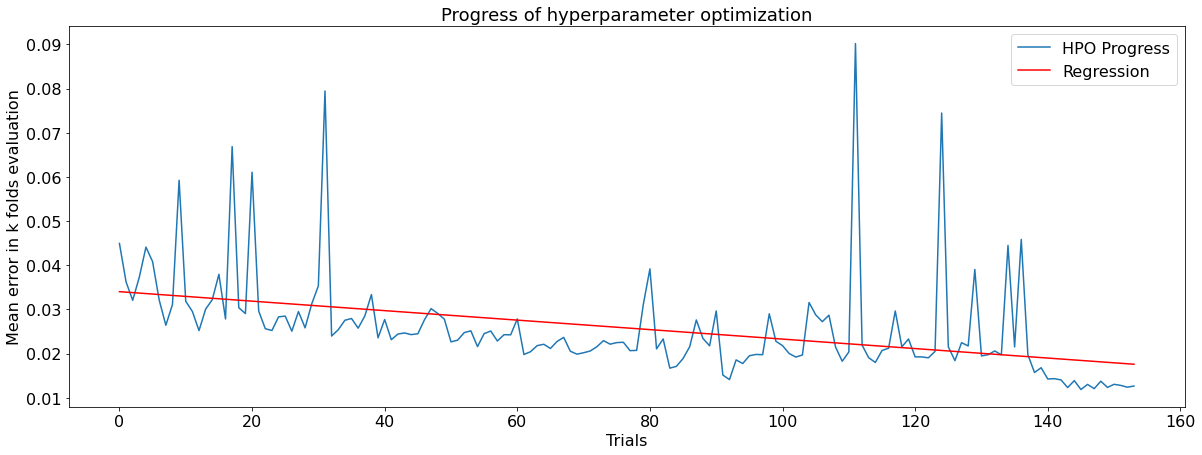

HPO Progess of cl_m-tcn-gru_out-48_freq-1h_03362
Improvement per Trial: 0.00015746236669956647


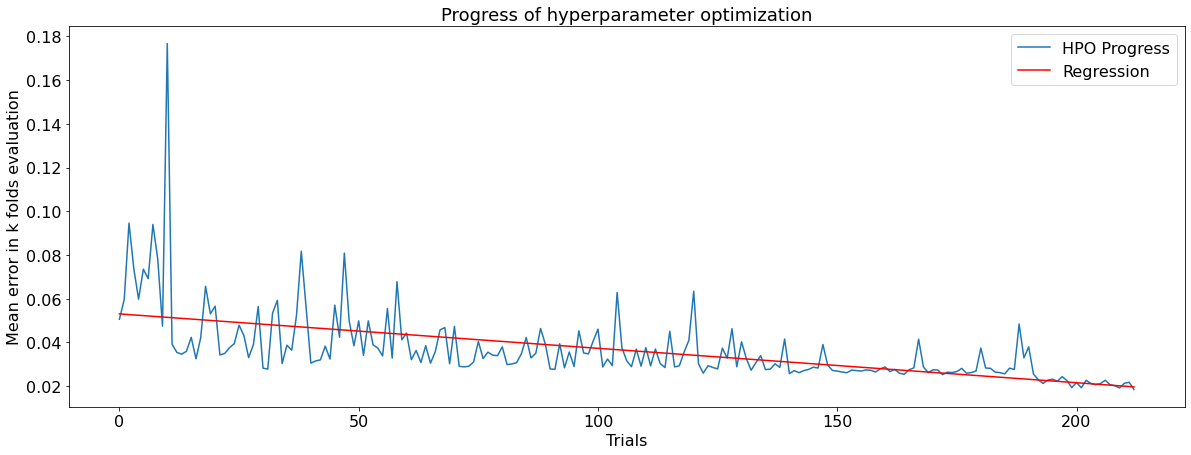

HPO Progess of cl_m-tcn-gru_out-48_freq-1h_03631
Improvement per Trial: 0.00032572862284544797


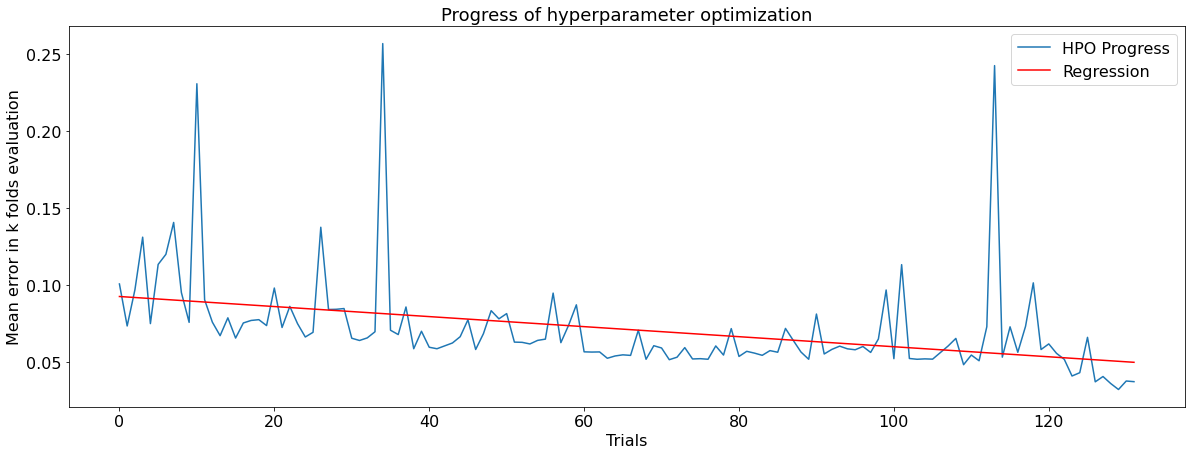

HPO Progess of cl_m-tcn-gru_out-48_freq-1h_07370
Improvement per Trial: 0.00023701233859897095


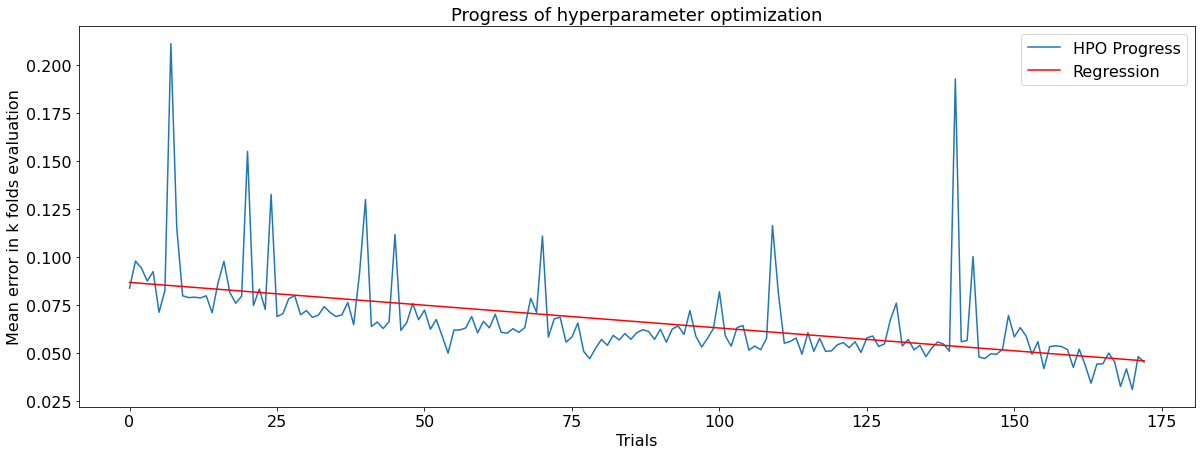

HPO Progess of cl_m-tft_out-48_freq-1h
Improvement per Trial: 0.0031037196516990654


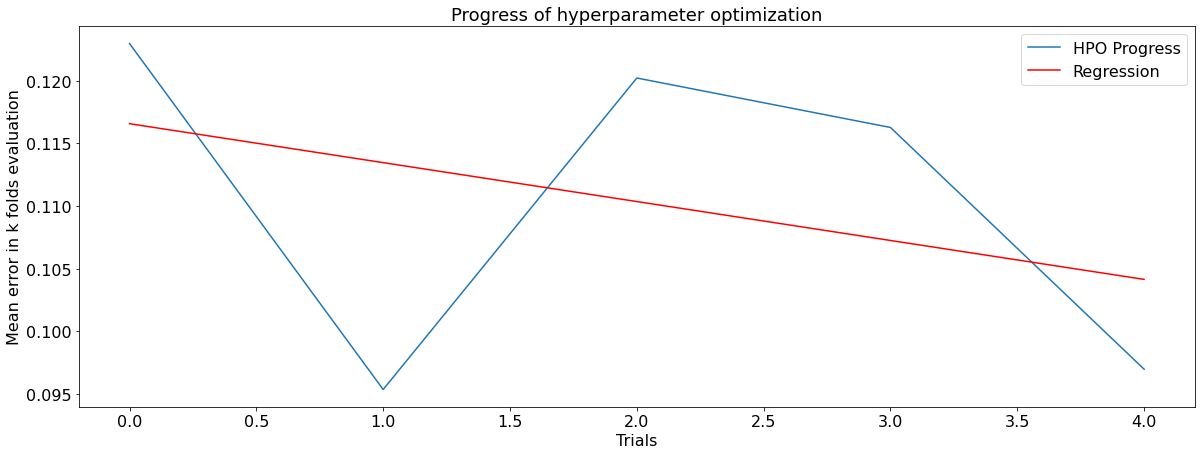

In [16]:
for study in studies:
    print(f'HPO Progess of {study.study_name}')
    trials = [trial for trial in study.trials if trial.value is not None and trial.state == optuna.trial.TrialState.COMPLETE]
    sorted_trials = sorted(trials, key=lambda x: x.value)
    sorted_by_number = sorted(trials, key=lambda x: x.number)
    progress = [trial.values for trial in sorted_by_number]
    x = np.arange(len(progress)).reshape(-1, 1)
    lr = LinearRegression()
    lr.fit(x, progress)
    y_pred = lr.predict(x)
    plt.figure(figsize=(20,7))
    print('Improvement per Trial:', lr.coef_[0][0]*-1)
    plt.plot(progress, label='HPO Progress')
    plt.plot(y_pred, 'r-', label='Regression')
    plt.title('Progress of hyperparameter optimization', fontsize=font_size+2)
    plt.xlabel('Trials', fontsize=font_size)
    plt.ylabel('Mean error in k folds evaluation', fontsize=font_size)
    ax = plt.gca()  # Get current axes
    ax.tick_params(axis='x', labelsize=font_size)  # Schriftgröße für x-Achsenmarkierungen
    ax.tick_params(axis='y', labelsize=font_size)
    #plt.yticks(np.arange(0,1,0.1))
    #plt.ylim(0,0.6)
    plt.legend(fontsize=font_size)
    plt.show()